In [19]:
from os import sys
import os
sys.path.append('../../')

# Getting packages #
%matplotlib widget

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import main

import plotly.express as px

# import main
import propellers
import motors
from aircraft import airplane
import cl_finders

# Setting Plot Defaults
plt.style.use('../../basic_plotter.mplstyle')

In [20]:
### Definining name of analysis ###
name = 'linus_thesis_acceleration_results'

figure_path = "/Users/williamkemp/Dropbox/Apps/Overleaf/Thesis_Draft_05_thefinalhurrah/Figures/linus_thesis_acceleration_results/"
# figure_path = '../Figures/'+name+'/'
if not os.path.exists(figure_path):
    os.makedirs(figure_path)


In [21]:
# Importing Drag Build Ups
build_turbulent = pd.read_pickle("../../DragBuilds/Linus_DragBuildTurbulent.pkl")
build_laminar = pd.read_pickle("../../DragBuilds/Linus_DragBuildLaminar.pkl")

In [22]:
path_ct = '../Results/2023-05-26_LinusSteadyLevel_100Hz_Cleaned/ct_cruise_segresult.pkl'
path_cth = '../Results/2023-05-26_LinusSteadyLevel_100Hz_Cleaned/cth_cruise_segresult.pkl'

path_a_set = '../Results/2023-06-02-a_Linus_Acceleration_Analysis_Cleaned_IMU_Set/acceleration_allresult.pkl'
path_a_cal = '../Results/2023-06-02-a_Linus_Acceleration_Analysis_Cleaned_IMU_Cal/acceleration_allresult.pkl'
path_a_na = '../Results/2023-06-02-a_Linus_Acceleration_Analysis_Cleaned_IMU_NA/acceleration_allresult.pkl'

path_b_set = '../Results/2023-06-02-b_Linus_Acceleration_Analysis_Cleaned_IMU_Set/acceleration_allresult.pkl'
path_b_cal = '../Results/2023-06-02-b_Linus_Acceleration_Analysis_Cleaned_IMU_Cal/acceleration_allresult.pkl'
path_b_na = '../Results/2023-06-02-b_Linus_Acceleration_Analysis_Cleaned_IMU_NA/acceleration_allresult.pkl'

In [23]:
mass = 1.8 # Estimated with virtual bolt included
span = 2.54
chord = 0.149
linus = airplane(mass, chord, span)
linus.area = 0.367
linus.AR = 17.583

In [24]:
# All Cruise Results Manually Segmented
acc_a_set_binresult_all = pd.read_pickle(path_a_set)
acc_a_cal_binresult_all = pd.read_pickle(path_a_cal)
acc_a_NA_binresult_all = pd.read_pickle(path_a_na)

acc_b_set_binresult_all = pd.read_pickle(path_b_set)
acc_b_cal_binresult_all = pd.read_pickle(path_b_cal)
acc_b_NA_binresult_all = pd.read_pickle(path_b_na)

ct_segresult = pd.read_pickle(path_ct)
cth_segresult = pd.read_pickle(path_cth)

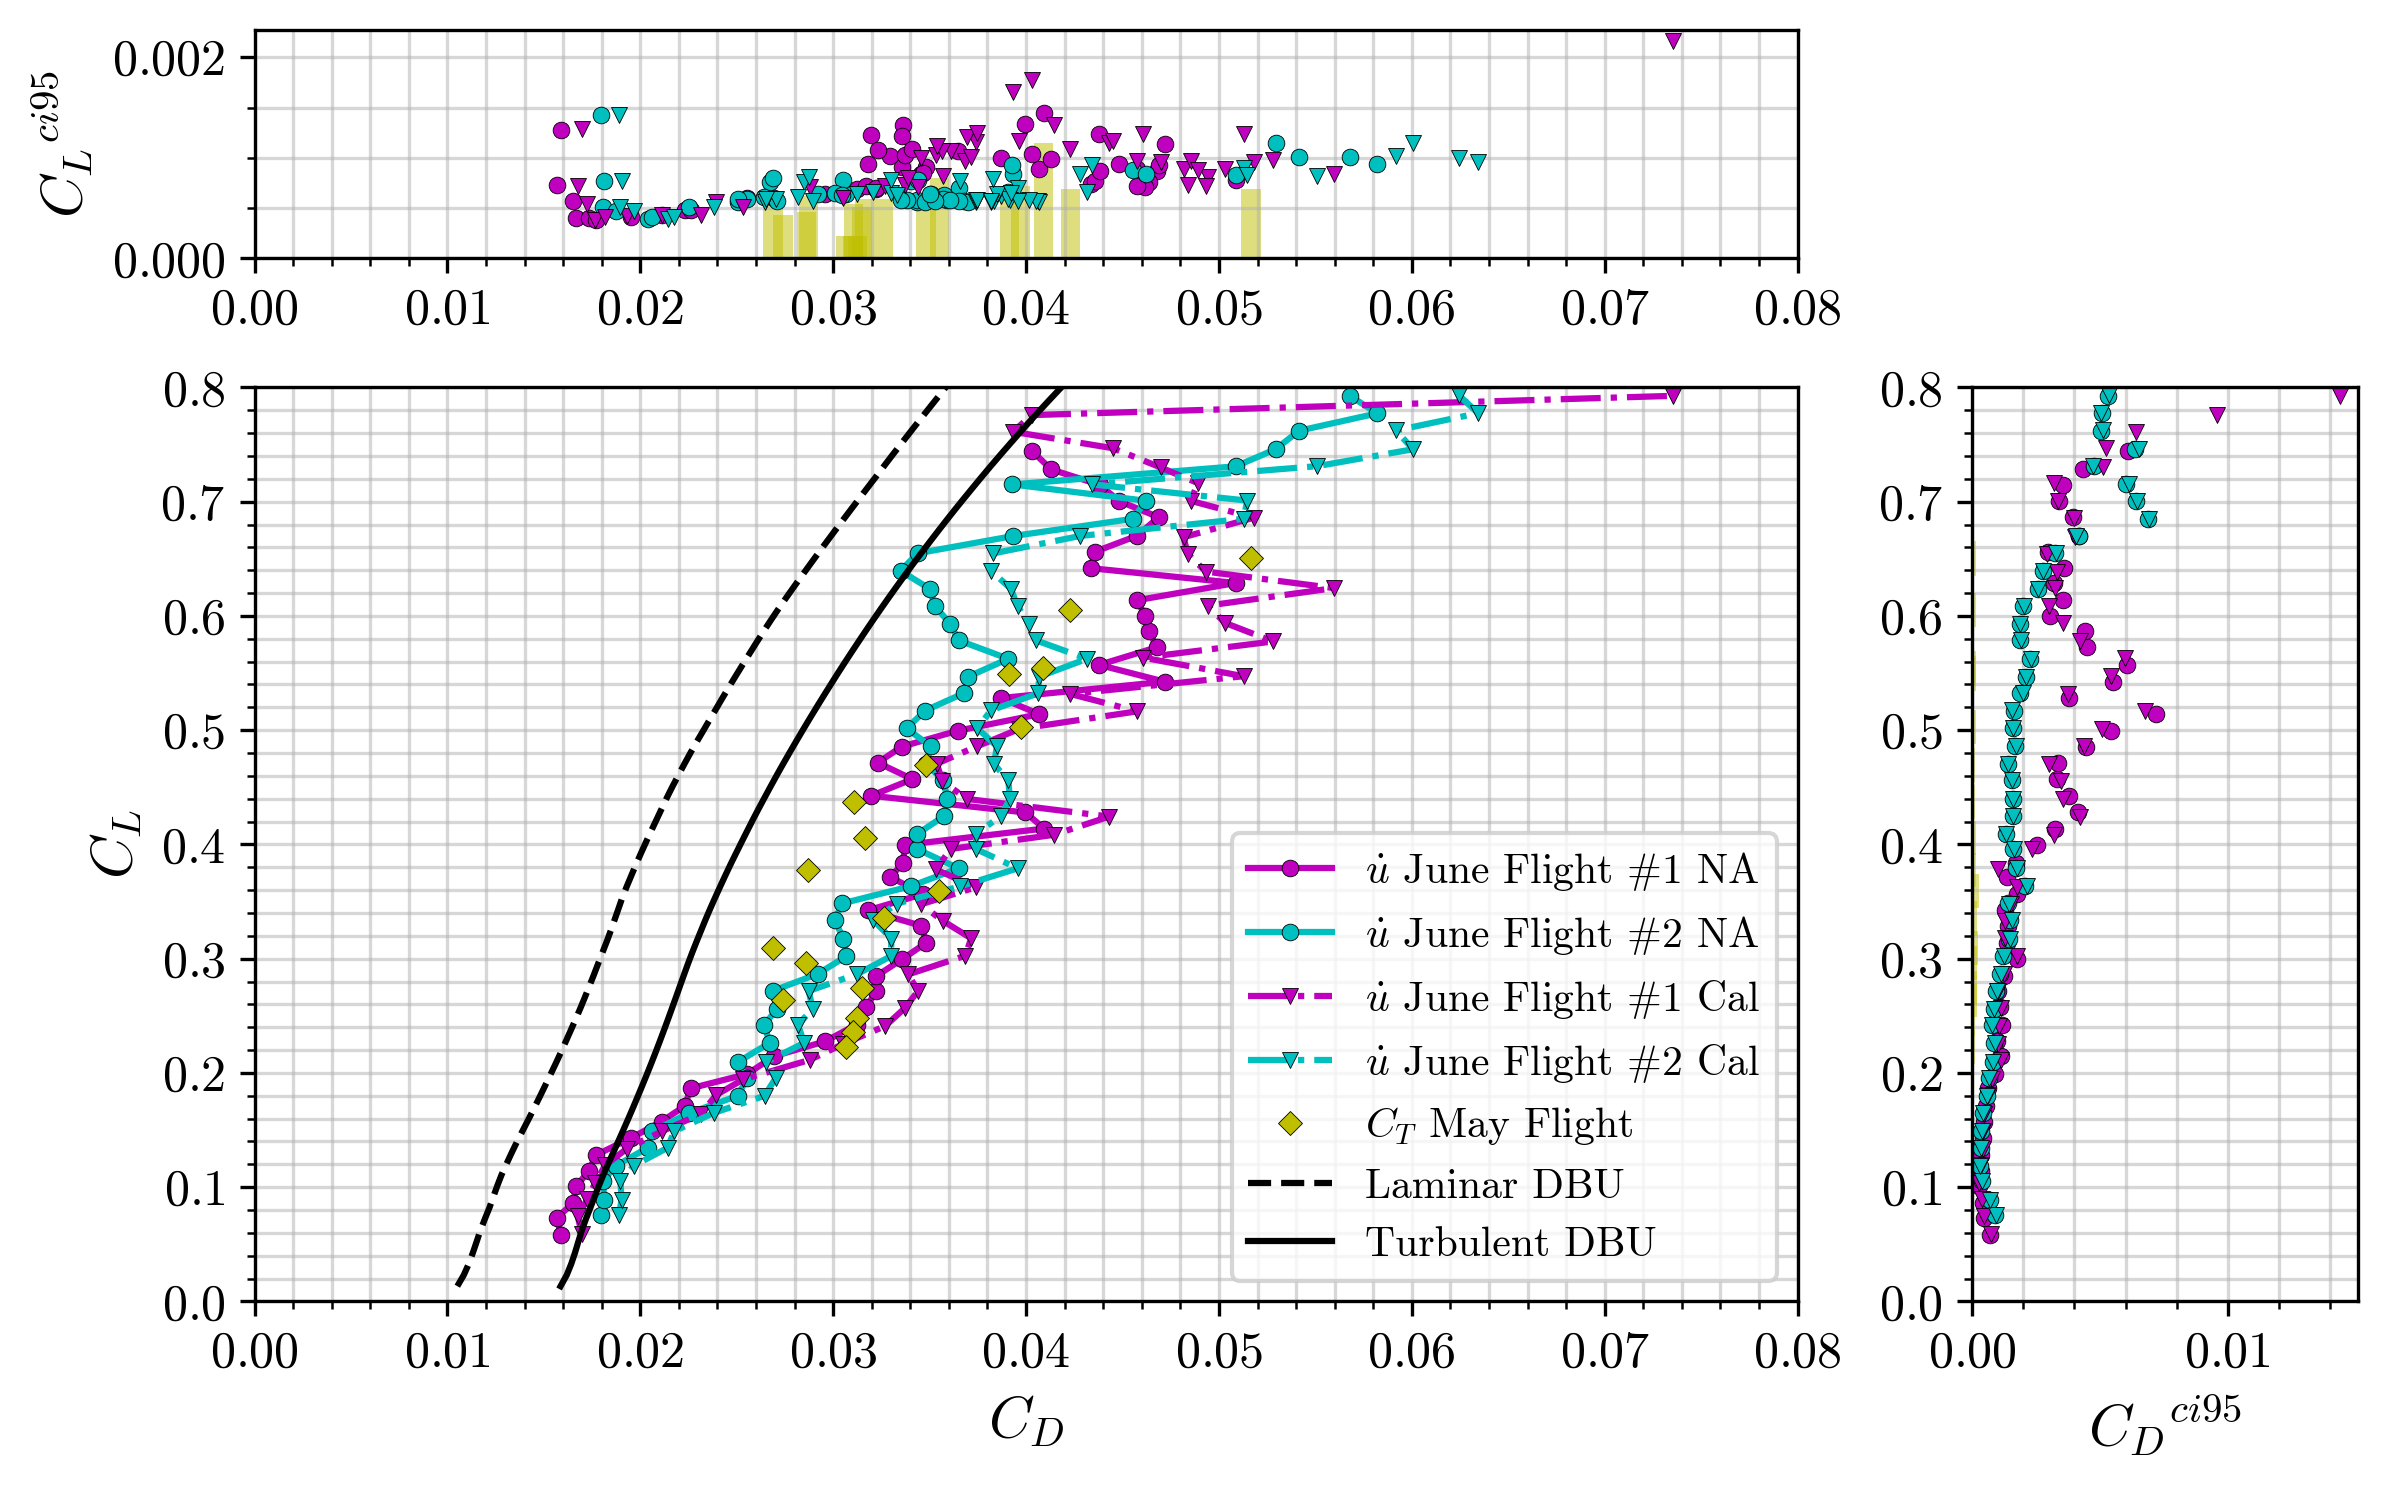

In [25]:
from matplotlib import gridspec
polar_acceleration_comparison_raw = plt.figure(dpi=300, figsize=(8,5))
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[4,1], height_ratios=[1,4])

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
BIGGEST_SIZE= 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGEST_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

ax0 = polar_acceleration_comparison_raw.add_subplot(gs[1,1])
ax1 = polar_acceleration_comparison_raw.add_subplot(gs[1,0])
ax2 = polar_acceleration_comparison_raw.add_subplot(gs[0,0])

heightbar = 0.03

ax0.barh(ct_segresult.ave_polar.CL, ct_segresult.ci95_polar.CD, height=heightbar, color='y', align='center', alpha=0.5)
ax0.plot(acc_a_NA_binresult_all.ci95_polar.CD, acc_a_NA_binresult_all.ave_polar.CL,  linestyle='', color='m', marker='o')
ax0.plot(acc_b_NA_binresult_all.ci95_polar.CD, acc_b_NA_binresult_all.ave_polar.CL,  linestyle='', color='c', marker='o')
ax0.plot(acc_a_cal_binresult_all.ci95_polar.CD, acc_a_cal_binresult_all.ave_polar.CL,  linestyle='', color='m', marker='v')
ax0.plot(acc_b_cal_binresult_all.ci95_polar.CD, acc_b_cal_binresult_all.ave_polar.CL,  linestyle='', color='c', marker='v')

# ax0.barh(eta_cruise_segresult_2022_06_13.ave_polar.CL, eta_cruise_segresult_2022_06_13.ci95_polar.CD, height=heightbar, color='m', align='center', alpha=0.5)
# ax0.barh(eta_cruise_segresult_2022_06_15.ave_polar.CL, eta_cruise_segresult_2022_06_15.ci95_polar.CD, height=heightbar, color='y', align='center', alpha=0.5)
# ax0.barh(eta_cruise_segresult_2023.ave_polar.CL, eta_cruise_segresult_2023.ci95_polar.CD, height=heightbar, color='r', align='center', alpha=0.5)
# ax0.barh(ct_cruise_segresult_2021.ave_polar.CL, ct_cruise_segresult_2021.ci95_polar.CD, height=heightbar, color='c', align='center', alpha=0.5)


ax1.plot(acc_a_NA_binresult_all.ave_polar.CD, acc_a_NA_binresult_all.ave_polar.CL, linestyle='-', color='m', marker='o', label="$\dot{u}$ June Flight #1 NA")
ax1.plot(acc_b_NA_binresult_all.ave_polar.CD, acc_b_NA_binresult_all.ave_polar.CL, linestyle='-', color='c', marker='o', label="$\dot{u}$ June Flight #2 NA")
ax1.plot(acc_a_cal_binresult_all.ave_polar.CD, acc_a_cal_binresult_all.ave_polar.CL, linestyle='-.', color='m', marker='v', label="$\dot{u}$ June Flight #1 Cal")
ax1.plot(acc_b_cal_binresult_all.ave_polar.CD, acc_b_cal_binresult_all.ave_polar.CL, linestyle='-.', color='c', marker='v', label="$\dot{u}$ June Flight #2 Cal")
ax1.plot(ct_segresult.ave_polar.CD, ct_segresult.ave_polar.CL, marker='D', color='y', linestyle='', label='$C_T$ May Flight')

ax1.plot(build_laminar.CD, build_laminar.CL, linestyle="--", marker="", color="black", label='Laminar DBU')
ax1.plot(build_turbulent.CD[:106], build_turbulent.CL[:106], linestyle="solid", marker="", color="black", label='Turbulent DBU')

widthbar=0.001

ax2.bar(ct_segresult.ave_polar.CD, ct_segresult.ci95_polar.CL, width=widthbar, color='y', align='center', alpha=0.5)
ax2.plot(acc_a_NA_binresult_all.ave_polar.CD, acc_a_NA_binresult_all.ci95_polar.CL, linestyle='', color='m', marker='o')
ax2.plot(acc_b_NA_binresult_all.ave_polar.CD, acc_b_NA_binresult_all.ci95_polar.CL,  linestyle='', color='c', marker='o')
ax2.plot(acc_a_cal_binresult_all.ave_polar.CD, acc_a_cal_binresult_all.ci95_polar.CL,  linestyle='', color='m', marker='v')
ax2.plot(acc_b_cal_binresult_all.ave_polar.CD, acc_b_cal_binresult_all.ci95_polar.CL,  linestyle='', color='c', marker='v')
# ax2.bar(eta_cruise_segresult_2022_06_13.ave_polar.CD, eta_cruise_segresult_2022_06_13.ci95_polar.CL, width=widthbar, color='m', align='center', alpha=0.5)
# ax2.bar(eta_cruise_segresult_2022_06_15.ave_polar.CD, eta_cruise_segresult_2022_06_15.ci95_polar.CL, width=widthbar, color='y', align='center', alpha=0.5)

ax1.legend(ncol=1, loc='lower right', fancybox=True)
ax0.set_xlabel("${C_D}^{ci95}$")
ax1.set_xlabel("$C_D$")
ax1.set_ylabel("$C_L$")
ax2.set_ylabel("${C_L}^{ci95}$")
ax1.set_xlim([0, 0.08])
ax2.set_xlim([0, 0.08])
ax1.set_ylim([0, 0.8])
ax0.set_ylim([0, 0.8])
plt.show()

main.save_figure(polar_acceleration_comparison_raw, f'{polar_acceleration_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)

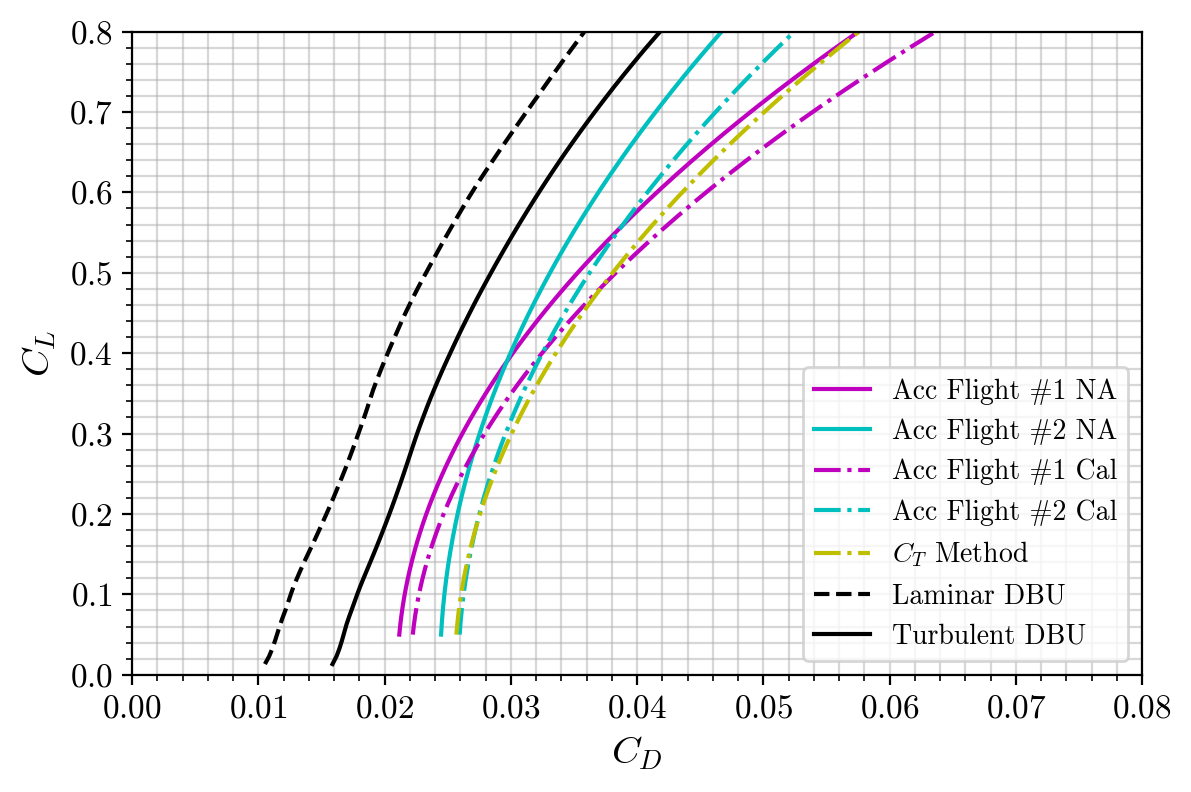

In [36]:
polar_acceleration_comparison_fit = plt.figure(dpi=200, figsize=(6,4))

# plt.plot(acc_a_NA_binresult_all.raw_polar.CD, acc_a_NA_binresult_all.raw_polar.CL, linestyle='', marker='.', markersize=2, alpha=0.3)
# plt.plot(acc_b_NA_binresult_all.raw_polar.CD, acc_b_NA_binresult_all.raw_polar.CL, linestyle='', marker='.', markersize=2, alpha=0.3)

plt.plot(cl_finders.plotfittedpolar(linus, acc_a_NA_binresult_all.fit_polar, [0.05, 1.2])[1], cl_finders.plotfittedpolar(linus, acc_a_NA_binresult_all.fit_polar, [0.05, 1.2])[0], marker='', markersize=5, color='m', linestyle='-', label="Acc Flight #1 NA")
plt.plot(cl_finders.plotfittedpolar(linus, acc_b_NA_binresult_all.fit_polar, [0.05, 1.2])[1], cl_finders.plotfittedpolar(linus, acc_b_NA_binresult_all.fit_polar, [0.05, 1.2])[0], marker='', markersize=5, color='c', linestyle='-', label="Acc Flight #2 NA")

plt.plot(cl_finders.plotfittedpolar(linus, acc_a_cal_binresult_all.fit_polar, [0.05, 1.2])[1], cl_finders.plotfittedpolar(linus, acc_a_cal_binresult_all.fit_polar, [0.05, 1.2])[0], marker='', markersize=5, color='m', linestyle='-.', label="Acc Flight #1 Cal")
plt.plot(cl_finders.plotfittedpolar(linus, acc_b_cal_binresult_all.fit_polar, [0.05, 1.2])[1], cl_finders.plotfittedpolar(linus, acc_b_cal_binresult_all.fit_polar, [0.05, 1.2])[0], marker='', markersize=5, color='c', linestyle='-.', label="Acc Flight #2 Cal")

plt.plot(cl_finders.plotfittedpolar(linus, ct_segresult.fit_polar, [0.05, 1.2])[1], cl_finders.plotfittedpolar(linus, ct_segresult.fit_polar, [0.05, 1.2])[0], marker='', markersize=5, color='y', linestyle='-.', label="$C_T$ Method")

# plt.plot(cl_finders.plotfittedpolar(linus, acc_NA_binresult_all.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(linus, acc_NA_binresult_all.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='m', linestyle='-',    label="All    - $\Delta \\theta = 0\degree$")
# plt.plot(cl_finders.plotfittedpolar(linus, acc_NA_binresult_good.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(linus, acc_NA_binresult_good.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='m', linestyle='-.', label="Good - $\Delta \\theta = 0\degree$")

# cl_finders.plotfittedpolar(linus,acc_set_binresult_all.fit_polar, [0.2, 1.2])[1]
# plt.plot(cl_finders.plotfittedpolar(linus,acc_set_binresult_all.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(linus,acc_set_binresult_all.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='y', linestyle='-', label="All    - $\Delta \\theta =-1.15\degree$")
# plt.plot(cl_finders.plotfittedpolar(linus,acc_set_binresult_good.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(linus,acc_set_binresult_good.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='y', linestyle='-.', label="Good - $\Delta \\theta =-1.15\degree$")

plt.plot(build_laminar.CD, build_laminar.CL, linestyle="--", marker="", color="black", label='Laminar DBU')
plt.plot(build_turbulent.CD[:106], build_turbulent.CL[:106], linestyle="solid", marker="", color="black", label='Turbulent DBU')

plt.legend(ncol=1, loc='lower right', fancybox=True)
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.xlim([0.00, 0.08])
plt.ylim([0.00, 0.8])
plt.show()
main.save_figure(polar_acceleration_comparison_fit, f'{polar_acceleration_comparison_fit=}'.split('=')[0], figure_path, overwrite=True)

In [27]:
polar = cl_finders.cd2polar(linus, build_turbulent.CD, build_turbulent.CL, highorder=False)
print(polar)

polar = cl_finders.cd2polar(linus, build_laminar.CD, build_laminar.CL, highorder=False)
print(polar)

0.7697739804762639
[0.0142383  0.41430207]
0.800961030661343
[0.01295558 0.47733313]


In [28]:
print(acc_a_NA_binresult_all.fit_polar[0])
print(acc_b_NA_binresult_all.fit_polar[0])

print(acc_a_cal_binresult_all.fit_polar[0])
print(acc_b_cal_binresult_all.fit_polar[0])

print(acc_a_set_binresult_all.fit_polar[0])
print(acc_b_set_binresult_all.fit_polar[0])

print(ct_segresult.fit_polar[0])

0.021012626626680832
0.024378136007603277
0.022063126308754774
0.02583172646173297
0.019963461357539444
0.022927180285813014
0.025550203308290147


In [29]:
print(acc_a_NA_binresult_all.fit_polar[1])
print(acc_b_NA_binresult_all.fit_polar[1])

print(acc_a_cal_binresult_all.fit_polar[1])
print(acc_b_cal_binresult_all.fit_polar[1])

print(acc_a_set_binresult_all.fit_polar[1])
print(acc_b_set_binresult_all.fit_polar[1])

print(ct_segresult.fit_polar[1])

0.31716063115465376
0.519180510385743
0.27858610897648434
0.43518335266130753
0.36814810117496594
0.6440116001906481
0.3617206542469966


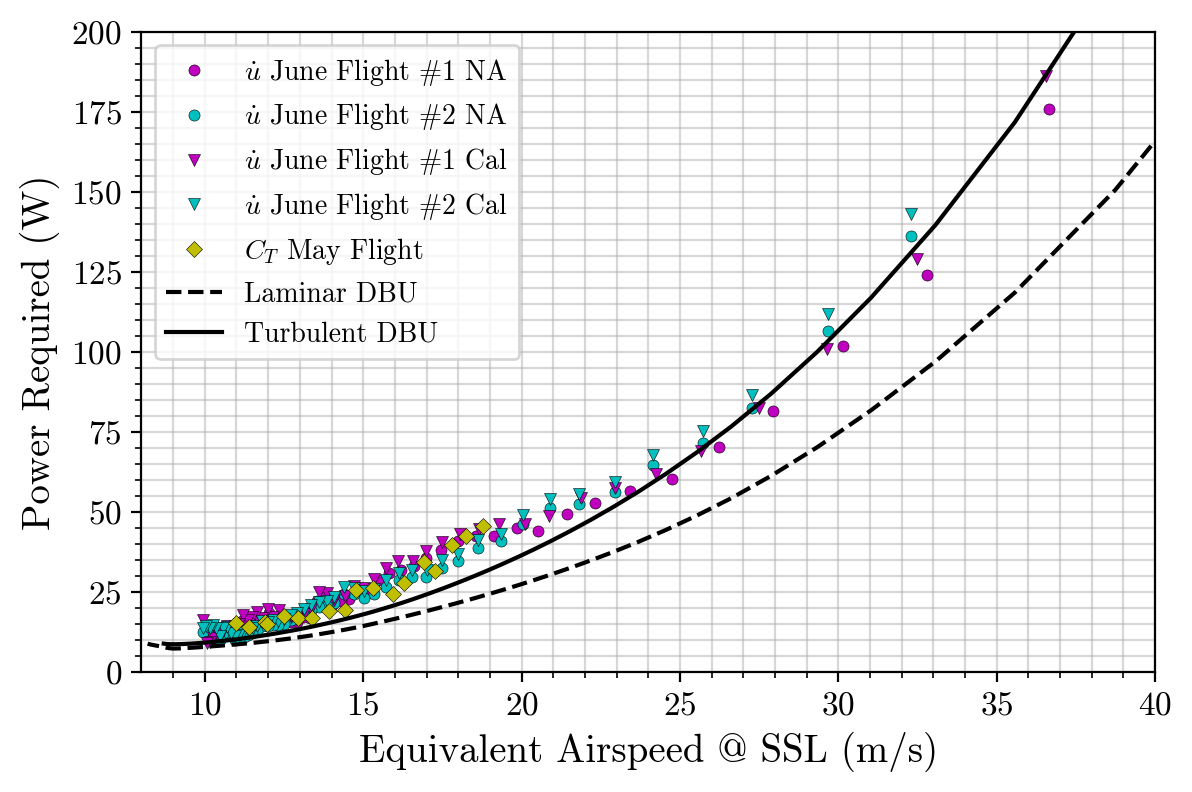

In [30]:
# Getting Power Required from CL, CD
[Preq_XFLR5_Turbulent, EAS_XFLR5_Turbulent] = cl_finders.rawpolar2preqew(linus, build_turbulent.CL, build_turbulent.CD)
[Preq_XFLR5_Laminar, EAS_XFLR5_Laminar] = cl_finders.rawpolar2preqew(linus, build_laminar.CL, build_laminar.CD)

# Plotting
preq_acceleration_comparison_raw = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.rawpolar2preqew(linus, acc_a_NA_binresult_all.ave_polar.CL , acc_a_NA_binresult_all.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='', marker='o', color='m', label="$\dot{u}$ June Flight #1 NA")

[Preq, EAS] = cl_finders.rawpolar2preqew(linus, acc_b_NA_binresult_all.ave_polar.CL , acc_b_NA_binresult_all.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='', marker='o', color='c', label="$\dot{u}$ June Flight #2 NA")

[Preq, EAS] = cl_finders.rawpolar2preqew(linus, acc_a_cal_binresult_all.ave_polar.CL , acc_a_cal_binresult_all.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='', marker='v', color='m', label="$\dot{u}$ June Flight #1 Cal")

[Preq, EAS] = cl_finders.rawpolar2preqew(linus, acc_b_cal_binresult_all.ave_polar.CL , acc_b_cal_binresult_all.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='', marker='v', color='c', label="$\dot{u}$ June Flight #2 Cal")

# [Preq, EAS] = cl_finders.rawpolar2preqew(linus, acc_NA_binresult_all.ave_polar.CL , acc_NA_binresult_all.ave_polar.CD)
# plt.plot(EAS, Preq, linestyle='-', marker='', color='m', label="")

# [Preq, EAS] = cl_finders.rawpolar2preqew(linus, acc_NA_binresult_good.ave_polar.CL , acc_NA_binresult_good.ave_polar.CD)
# plt.plot(EAS, Preq, linestyle='--', marker='', color='m', label="")

# [Preq, EAS] = cl_finders.rawpolar2preqew(linus, acc_set_binresult_all.ave_polar.CL , acc_set_binresult_all.ave_polar.CD)
# plt.plot(EAS, Preq, linestyle='-', marker='', color='y', label="")

[Preq, EAS] = cl_finders.rawpolar2preqew(linus, ct_segresult.ave_polar.CL , ct_segresult.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='', marker='D', color='y', label="$C_T$ May Flight")

plt.plot(EAS_XFLR5_Laminar, Preq_XFLR5_Laminar, linestyle='--', marker='', color="black", label="Laminar DBU")
plt.plot(EAS_XFLR5_Turbulent, Preq_XFLR5_Turbulent, linestyle='-', marker='', color="black", label="Turbulent DBU")

plt.xlabel("Equivalent Airspeed @ SSL (m/s)")
plt.ylabel("Power Required (W)")
plt.xlim(left=8, right=40)
plt.ylim([0, 200])
plt.legend(ncol=1, loc='best', fancybox=True)
plt.show()
main.save_figure(preq_acceleration_comparison_raw, f'{preq_acceleration_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)

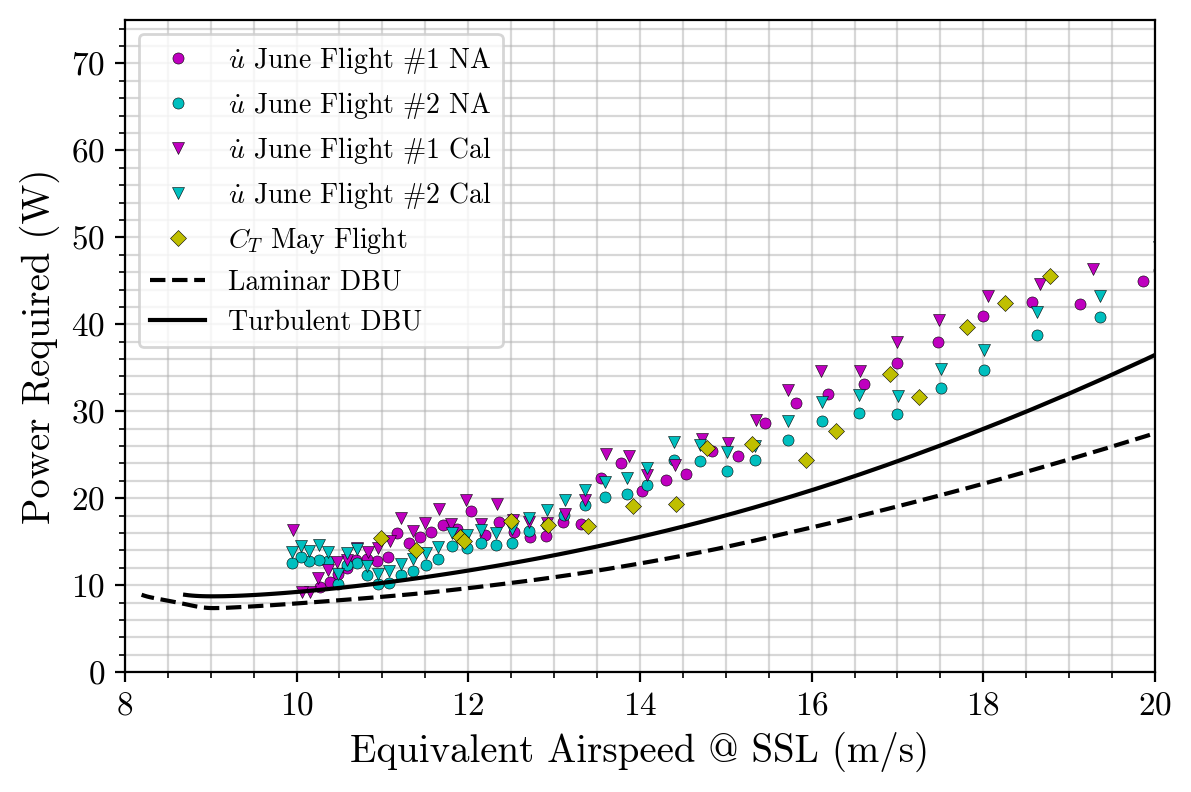

In [31]:
# Getting Power Required from CL, CD
[Preq_XFLR5_Turbulent, EAS_XFLR5_Turbulent] = cl_finders.rawpolar2preqew(linus, build_turbulent.CL, build_turbulent.CD)
[Preq_XFLR5_Laminar, EAS_XFLR5_Laminar] = cl_finders.rawpolar2preqew(linus, build_laminar.CL, build_laminar.CD)

# Plotting
preq_acceleration_comparison_tightraw = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.rawpolar2preqew(linus, acc_a_NA_binresult_all.ave_polar.CL , acc_a_NA_binresult_all.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='', marker='o', color='m', label="$\dot{u}$ June Flight #1 NA")

[Preq, EAS] = cl_finders.rawpolar2preqew(linus, acc_b_NA_binresult_all.ave_polar.CL , acc_b_NA_binresult_all.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='', marker='o', color='c', label="$\dot{u}$ June Flight #2 NA")

[Preq, EAS] = cl_finders.rawpolar2preqew(linus, acc_a_cal_binresult_all.ave_polar.CL , acc_a_cal_binresult_all.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='', marker='v', color='m', label="$\dot{u}$ June Flight #1 Cal")

[Preq, EAS] = cl_finders.rawpolar2preqew(linus, acc_b_cal_binresult_all.ave_polar.CL , acc_b_cal_binresult_all.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='', marker='v', color='c', label="$\dot{u}$ June Flight #2 Cal")

# [Preq, EAS] = cl_finders.rawpolar2preqew(linus, acc_NA_binresult_all.ave_polar.CL , acc_NA_binresult_all.ave_polar.CD)
# plt.plot(EAS, Preq, linestyle='-', marker='', color='m', label="")

# [Preq, EAS] = cl_finders.rawpolar2preqew(linus, acc_NA_binresult_good.ave_polar.CL , acc_NA_binresult_good.ave_polar.CD)
# plt.plot(EAS, Preq, linestyle='--', marker='', color='m', label="")

# [Preq, EAS] = cl_finders.rawpolar2preqew(linus, acc_set_binresult_all.ave_polar.CL , acc_set_binresult_all.ave_polar.CD)
# plt.plot(EAS, Preq, linestyle='-', marker='', color='y', label="")

[Preq, EAS] = cl_finders.rawpolar2preqew(linus, ct_segresult.ave_polar.CL , ct_segresult.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='', marker='D', color='y', label="$C_T$ May Flight")

plt.plot(EAS_XFLR5_Laminar, Preq_XFLR5_Laminar, linestyle='--', marker='', color="black", label="Laminar DBU")
plt.plot(EAS_XFLR5_Turbulent, Preq_XFLR5_Turbulent, linestyle='-', marker='', color="black", label="Turbulent DBU")

plt.xlabel("Equivalent Airspeed @ SSL (m/s)")
plt.ylabel("Power Required (W)")
plt.xlim(left=8, right=20)
plt.ylim([0, 75])
plt.legend(ncol=1, loc='best', fancybox=True)
plt.show()
main.save_figure(preq_acceleration_comparison_tightraw, f'{preq_acceleration_comparison_tightraw=}'.split('=')[0], figure_path, overwrite=True)

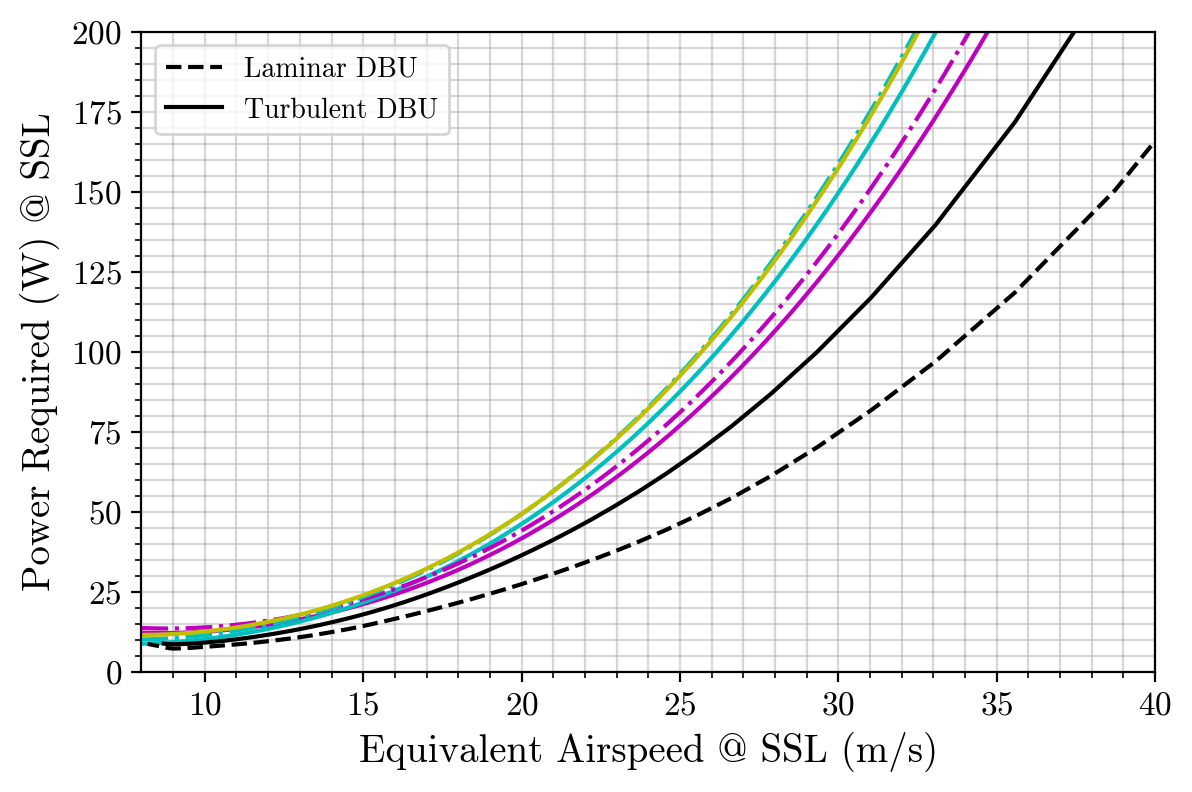

In [32]:
# Getting Power Required from Polars
[Preq_XFLR5_Turbulent, EAS_XFLR5_Turbulent] = cl_finders.rawpolar2preqew(linus, build_turbulent.CL, build_turbulent.CD)
[Preq_XFLR5_Laminar, EAS_XFLR5_Laminar] = cl_finders.rawpolar2preqew(linus, build_laminar.CL, build_laminar.CD)

# Plotting
preq_acceleration_comparison_fit = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.polar2preqew(linus, acc_a_NA_binresult_all.fit_polar, [8, 35], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', markersize=5, color='m', linestyle='-', label="")
[Preq, EAS] = cl_finders.polar2preqew(linus, acc_b_NA_binresult_all.fit_polar, [8, 35], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', markersize=5, color='c', linestyle='-', label="")

[Preq, EAS] = cl_finders.polar2preqew(linus, acc_a_cal_binresult_all.fit_polar, [8, 35], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', markersize=5, color='m', linestyle='-.', label="")
[Preq, EAS] = cl_finders.polar2preqew(linus, acc_b_cal_binresult_all.fit_polar, [8, 35], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', markersize=5, color='c', linestyle='-.', label="")

[Preq, EAS] = cl_finders.polar2preqew(linus, ct_segresult.fit_polar, [8, 35], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', markersize=5, color='y', linestyle='-', label="")


plt.plot(EAS_XFLR5_Laminar, Preq_XFLR5_Laminar, linestyle='--', color='black', marker='', label='Laminar DBU')
plt.plot(EAS_XFLR5_Turbulent, Preq_XFLR5_Turbulent, linestyle='solid', color='black', marker='', label='Turbulent DBU')

plt.xlim(left=8, right=40)
plt.ylim([0, 200])
plt.xlabel("Equivalent Airspeed @ SSL (m/s)")
plt.ylabel("Power Required (W) @ SSL")
plt.legend(ncol=1, loc='upper left', fancybox=True)
plt.show()
main.save_figure(preq_acceleration_comparison_fit, f'{preq_acceleration_comparison_fit=}'.split('=')[0], figure_path, overwrite=True)

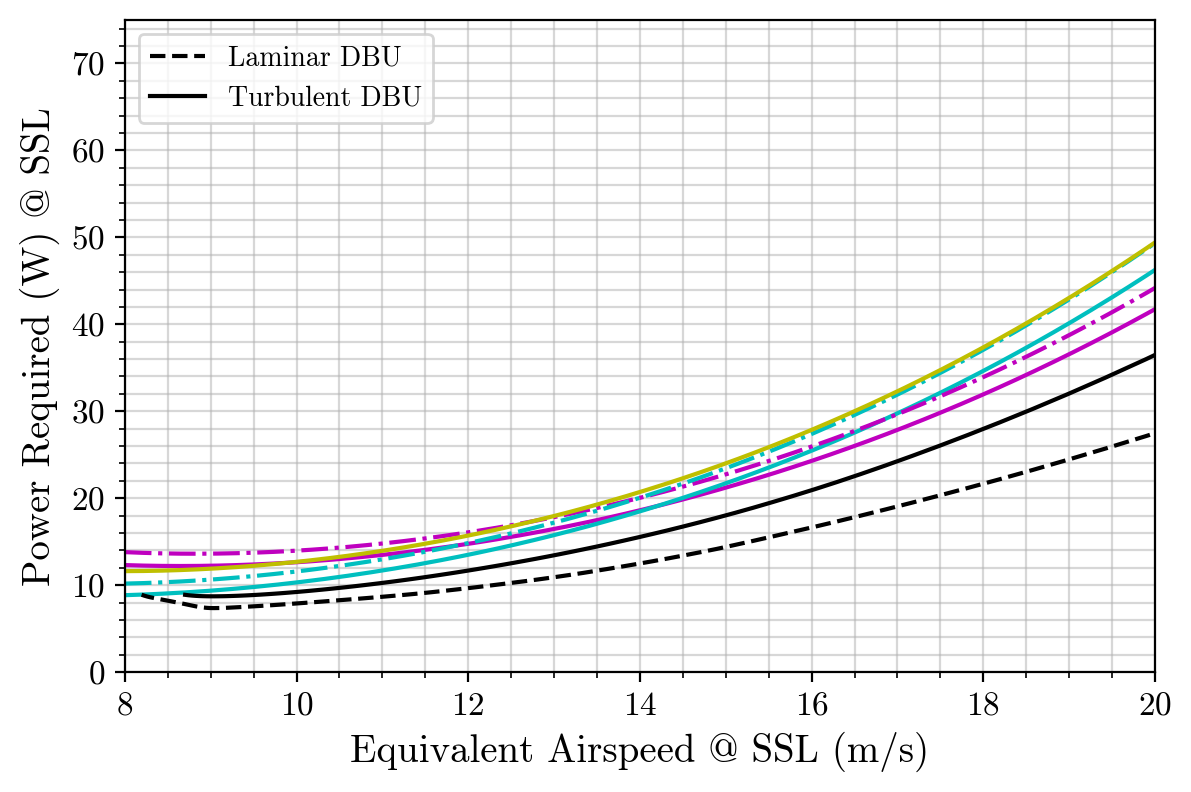

In [33]:
# Getting Power Required from Polars
[Preq_XFLR5_Turbulent, EAS_XFLR5_Turbulent] = cl_finders.rawpolar2preqew(linus, build_turbulent.CL, build_turbulent.CD)
[Preq_XFLR5_Laminar, EAS_XFLR5_Laminar] = cl_finders.rawpolar2preqew(linus, build_laminar.CL, build_laminar.CD)

# Plotting
preq_acceleration_comparison_tightfit = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.polar2preqew(linus, acc_a_NA_binresult_all.fit_polar, [8, 35], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', markersize=5, color='m', linestyle='-', label="")
[Preq, EAS] = cl_finders.polar2preqew(linus, acc_b_NA_binresult_all.fit_polar, [8, 35], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', markersize=5, color='c', linestyle='-', label="")

[Preq, EAS] = cl_finders.polar2preqew(linus, acc_a_cal_binresult_all.fit_polar, [8, 35], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', markersize=5, color='m', linestyle='-.', label="")
[Preq, EAS] = cl_finders.polar2preqew(linus, acc_b_cal_binresult_all.fit_polar, [8, 35], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', markersize=5, color='c', linestyle='-.', label="")

[Preq, EAS] = cl_finders.polar2preqew(linus, ct_segresult.fit_polar, [8, 35], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', markersize=5, color='y', linestyle='-', label="")


plt.plot(EAS_XFLR5_Laminar, Preq_XFLR5_Laminar, linestyle='--', color='black', marker='', label='Laminar DBU')
plt.plot(EAS_XFLR5_Turbulent, Preq_XFLR5_Turbulent, linestyle='solid', color='black', marker='', label='Turbulent DBU')
plt.xlim(left=8, right=20)
plt.ylim([0, 75])
plt.xlabel("Equivalent Airspeed @ SSL (m/s)")
plt.ylabel("Power Required (W) @ SSL")
plt.legend(ncol=1, loc='upper left', fancybox=True)
plt.show()
main.save_figure(preq_acceleration_comparison_tightfit, f'{preq_acceleration_comparison_tightfit=}'.split('=')[0], figure_path, overwrite=True)

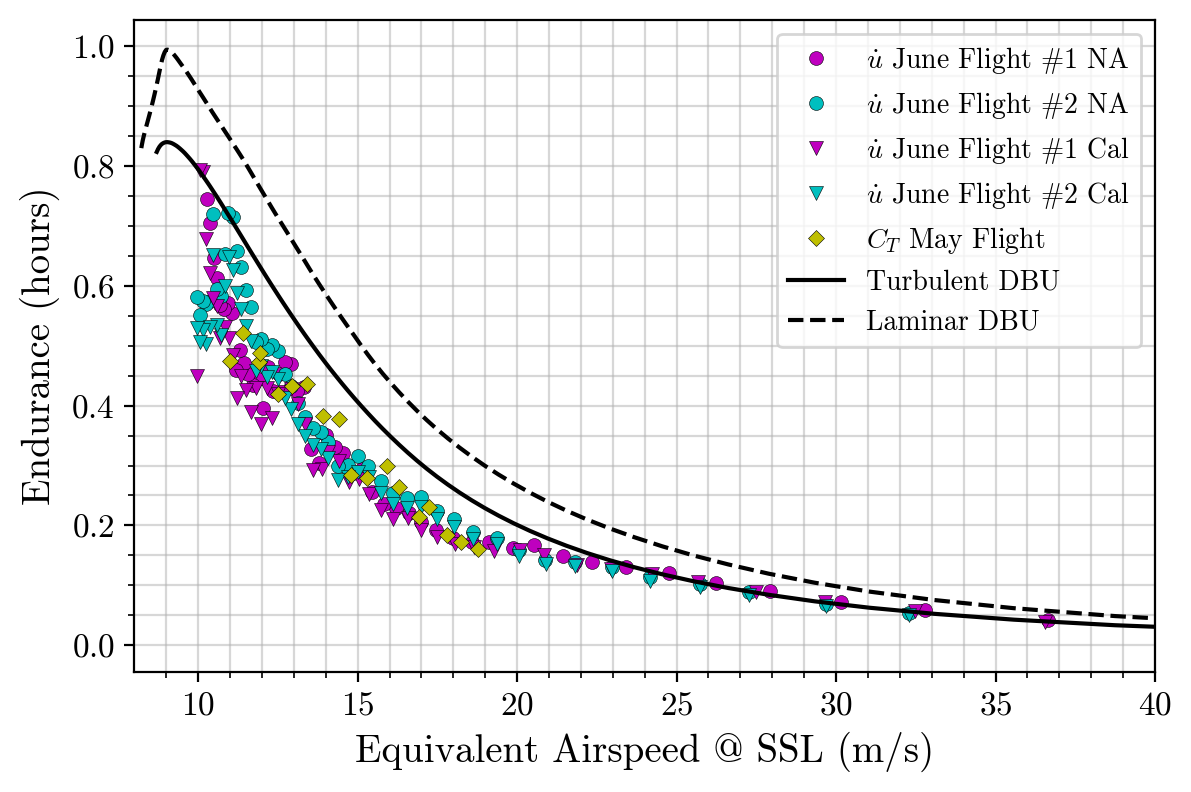

In [34]:
# Calculating Endurance for Raw Cruise

P_total = 24.412 # Wh
efficiency= 0.3

# Getting Power Required from CL, CD
[Preq_XFLR5_Turbulent, EAS_XFLR5_Turbulent] = cl_finders.rawpolar2preqew(linus, build_turbulent.CL, build_turbulent.CD)
[Preq_XFLR5_Laminar, EAS_XFLR5_Laminar] = cl_finders.rawpolar2preqew(linus, build_laminar.CL, build_laminar.CD)

# Plotting
end_acceleration_comparison_raw = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.rawpolar2preqew(linus, acc_a_NA_binresult_all.ave_polar.CL , acc_a_NA_binresult_all.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), marker='o', markersize=5, color='m', linestyle='', label="$\dot{u}$ June Flight #1 NA")
[Preq, EAS] = cl_finders.rawpolar2preqew(linus, acc_b_NA_binresult_all.ave_polar.CL , acc_b_NA_binresult_all.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), marker='o', markersize=5, color='c', linestyle='', label="$\dot{u}$ June Flight #2 NA")

[Preq, EAS] = cl_finders.rawpolar2preqew(linus, acc_a_cal_binresult_all.ave_polar.CL , acc_a_cal_binresult_all.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), marker='v', markersize=5, color='m', linestyle='', label="$\dot{u}$ June Flight #1 Cal")
[Preq, EAS] = cl_finders.rawpolar2preqew(linus, acc_b_cal_binresult_all.ave_polar.CL , acc_b_cal_binresult_all.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), marker='v', markersize=5, color='c', linestyle='', label="$\dot{u}$ June Flight #2 Cal")

[Preq, EAS] = cl_finders.rawpolar2preqew(linus, ct_segresult.ave_polar.CL , ct_segresult.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), linestyle='', marker='D', color='y', label="$C_T$ May Flight")


plt.plot(EAS_XFLR5_Turbulent, P_total/(Preq_XFLR5_Turbulent/efficiency), linestyle='solid', color='black', marker='', label='Turbulent DBU')
plt.plot(EAS_XFLR5_Laminar, P_total/(Preq_XFLR5_Laminar/efficiency), linestyle='--', color='black', marker='', label='Laminar DBU')

plt.xlabel("Equivalent Airspeed @ SSL (m/s)")
plt.ylabel("Endurance (hours)")
plt.legend(ncol=1, loc='upper right', fancybox=True)
plt.xlim([8,40])
# plt.ylim([3,25])# 
plt.show()
main.save_figure(end_acceleration_comparison_raw, f'{end_acceleration_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)